## Dolphins graph

- Download the .mtx graph file from https://networkrepository.com/soc-dolphins.php. 
- This file essentially is a matrix file depicting the edges of the graph.

In [ ]:
from scipy.io import mmread

dolphins = mmread('drive/MyDrive/EE5111/soc-dolphins.mtx')
dolphins = dolphins.toarray()

In [ ]:
dolphins.shape

(62, 62)

The graph has 62 nodes.

1 represents the presence of an edge, 0 represents the absence of an edge

## Transition matrix for simple random walk

In [ ]:
import numpy as np

In [ ]:
def gen_srw_transition(graph):

  vertices = graph.shape[0]
  trans_mtx = np.zeros((vertices, vertices))
  degrees = []

  for i in range(vertices):
    total_edges = np.sum(graph[i, :])
    degrees.append(total_edges)
    trans_mtx[i, :] = graph[i, :]/total_edges
  
  return trans_mtx, degrees

In [ ]:
srw_mtx, d = gen_srw_transition(dolphins)

In [ ]:
srw_mtx[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.16666667, 0.        , 0.        , 0.        , 0.16666667,
       0.16666667, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.16666667, 0.        , 0.16666667, 0.        , 0.        ,
       0.        , 0.        , 0.16666667, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [ ]:
sum(d)

318.0

## Sum of non-convex functions

In [ ]:
# No: of datapoints
n = 62

# Dimension of paramater vector
k = 10

a_sum = np.zeros((k, k))
A = np.zeros((k, n))

for i in range(n):
  a = np.random.rand(k)
  A[:, i] = a
  a_sum += (a.reshape(k, 1) @ a.reshape(1, k))

a_sum /= n

try:
  print(np.linalg.inv(a_sum))
  print("Inverse exists")
except:
  print("Failed!")

D = np.zeros((k, k, n))

for i in range(k):
  D[i, i, :(n//2)] = 1.1
  D[i, i, (n//2):] = -1.1

b = np.random.rand(k, 1)




[[12.6244613  -0.30274863 -2.90911122 -0.1649202  -2.56131619 -0.74913072
  -2.95173006 -0.34996731 -2.37082739  0.36806271]
 [-0.30274863 12.70288223 -0.78521752 -1.53977517 -2.39745214 -1.51218485
  -1.33769507 -0.93038154 -1.37049304 -0.51501957]
 [-2.90911122 -0.78521752 11.62336075 -0.55779022 -1.5153138  -0.40163257
  -0.34479575 -1.31931786 -0.99101828 -3.11233553]
 [-0.1649202  -1.53977517 -0.55779022 12.64408964  0.54005601 -2.14409588
  -2.67888131 -3.72375086 -2.29545319 -1.21501986]
 [-2.56131619 -2.39745214 -1.5153138   0.54005601 12.62622667 -1.4139234
  -2.32656755 -1.2125177   1.92200303 -3.06345585]
 [-0.74913072 -1.51218485 -0.40163257 -2.14409588 -1.4139234   9.98240282
  -1.87954491  0.90519679 -1.97104527 -0.17256182]
 [-2.95173006 -1.33769507 -0.34479575 -2.67888131 -2.32656755 -1.87954491
  14.14687235 -1.47690534  0.99248705 -1.33045115]
 [-0.34996731 -0.93038154 -1.31931786 -3.72375086 -1.2125177   0.90519679
  -1.47690534 11.23715685 -2.62116033  0.41371779]
 

In [ ]:
theta_optim = -0.5*( np.linalg.inv(a_sum) @ b )

In [ ]:
theta_optim

array([[-0.06768362],
       [-3.56501516],
       [-0.79489113],
       [ 1.51038738],
       [ 0.68248143],
       [ 2.00152675],
       [-4.04833295],
       [ 1.84678127],
       [-1.99406294],
       [ 2.55515734]])

In [ ]:
def fun(x):
  x = x.reshape(k, 1)
  return x.T @ a_sum @ x + b.T @ x

In [ ]:
from scipy.optimize import minimize

In [ ]:
test = minimize(fun, np.random.rand(k))

In [ ]:
test

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -2.8263030824029234
        x: [ 4.997e-01 -2.363e+00  5.578e-01 -2.836e+00  2.284e+00
             2.709e+00 -3.769e+00 -1.149e+00  1.216e+00  1.482e+00]
      nit: 26
      jac: [-4.560e-06  8.941e-07  6.735e-06  9.805e-06  6.199e-06
             3.010e-06  3.338e-06 -6.407e-06 -2.384e-06  9.418e-06]
 hess_inv: [[ 3.990e+00 -1.293e+00 ... -1.770e+00  1.037e+00]
            [-1.293e+00  2.551e+00 ...  8.296e-01 -1.031e+00]
            ...
            [-1.770e+00  8.296e-01 ...  4.613e+00 -3.036e-01]
            [ 1.037e+00 -1.031e+00 ... -3.036e-01  4.469e+00]]
     nfev: 297
     njev: 27

### Performing SGD

In [ ]:
import matplotlib.pyplot as plt

In [ ]:


losses = []

num_expts = 50

for expt in range(num_expts):

  print("Running experiment:", expt+1)

  ep_loss = []

  theta = np.random.rand(k, 1)

  num_iter = int(1e5)

  current_node = np.random.choice(np.arange(0, n))

  for i in range(1, num_iter + 1):

    a_i = A[:, current_node].reshape(k, 1)
    D_i = D[:, :, current_node].reshape(k, k)

    gamma = 1/(i**(0.9))

    grad_g = (sum(d)/(n*d[current_node]))*(2*( (a_i @ (a_i.T) + D_i) @ theta) + b)

    theta -= gamma * grad_g

    current_node = np.random.choice(np.arange(0, n), p = srw_mtx[current_node].reshape(n))  

    ep_loss.append(np.linalg.norm(theta - theta_optim)**2)
  
  losses.append(ep_loss)




Running experiment: 1
Running experiment: 2
Running experiment: 3
Running experiment: 4
Running experiment: 5
Running experiment: 6
Running experiment: 7
Running experiment: 8
Running experiment: 9
Running experiment: 10
Running experiment: 11
Running experiment: 12
Running experiment: 13
Running experiment: 14
Running experiment: 15
Running experiment: 16
Running experiment: 17
Running experiment: 18
Running experiment: 19
Running experiment: 20
Running experiment: 21
Running experiment: 22
Running experiment: 23
Running experiment: 24
Running experiment: 25
Running experiment: 26
Running experiment: 27
Running experiment: 28
Running experiment: 29
Running experiment: 30
Running experiment: 31
Running experiment: 32
Running experiment: 33
Running experiment: 34
Running experiment: 35
Running experiment: 36
Running experiment: 37
Running experiment: 38
Running experiment: 39
Running experiment: 40
Running experiment: 41
Running experiment: 42
Running experiment: 43
Running experiment: 

In [ ]:
exp_loss_srw = np.mean(np.array(losses), axis = 0)

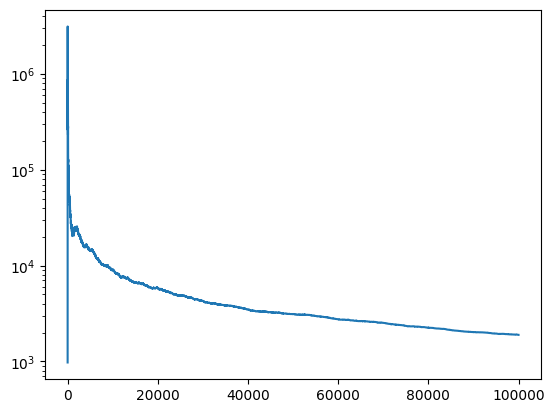

In [ ]:
plt.plot(np.arange(0, num_iter), (exp_loss_srw))
plt.yscale('log')

In [ ]:

losses_nbrw = []

num_expts = 50

for expt in range(num_expts):

  print("Running experiment:", expt+1)

  theta = np.random.rand(k, 1)

  num_iter = int(1e5)

  ep_loss = []

  current_node = np.random.choice(np.arange(0, n))

  for i in range(1, num_iter + 1):
  

    a_i = A[:, current_node].reshape(k, 1)
    D_i = D[:, :, current_node].reshape(k, k)

    gamma = 1/(i**(0.9))

    grad_g = (sum(d)/(n*d[current_node]))*(2*( (a_i @ (a_i.T) + D_i) @ theta) + b)

    theta -= gamma * grad_g

    if i == 1:
      previous_node = current_node
      current_node = np.random.choice(np.arange(0, n), p = srw_mtx[current_node].reshape(n))  

    else:
      probs_nbrw = dolphins[current_node].copy()
      probs_nbrw[previous_node] = 0
      if probs_nbrw.sum() == 0:
        probs_nbrw[previous_node] = 1
      else:
        probs_nbrw /= probs_nbrw.sum()
      previous_node = current_node
      current_node = np.random.choice(np.arange(0, n), p = probs_nbrw)
    
    ep_loss.append(np.linalg.norm(theta - theta_optim)**2)

  losses_nbrw.append(ep_loss)


Running experiment: 1
Running experiment: 2
Running experiment: 3
Running experiment: 4
Running experiment: 5
Running experiment: 6
Running experiment: 7
Running experiment: 8
Running experiment: 9
Running experiment: 10
Running experiment: 11
Running experiment: 12
Running experiment: 13
Running experiment: 14
Running experiment: 15
Running experiment: 16
Running experiment: 17
Running experiment: 18
Running experiment: 19
Running experiment: 20
Running experiment: 21
Running experiment: 22
Running experiment: 23
Running experiment: 24
Running experiment: 25
Running experiment: 26
Running experiment: 27
Running experiment: 28
Running experiment: 29
Running experiment: 30
Running experiment: 31
Running experiment: 32
Running experiment: 33
Running experiment: 34
Running experiment: 35
Running experiment: 36
Running experiment: 37
Running experiment: 38
Running experiment: 39
Running experiment: 40
Running experiment: 41
Running experiment: 42
Running experiment: 43
Running experiment: 

In [ ]:
exp_loss_nbrw = np.mean(np.array(losses_nbrw), axis = 0)

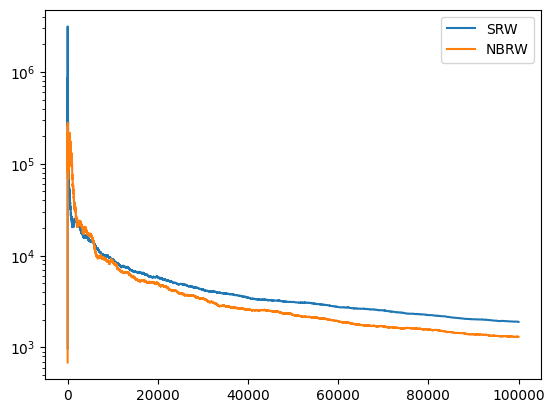

In [ ]:
plt.plot(np.arange(0, num_iter), (exp_loss_srw), label = 'SRW')
plt.plot(np.arange(0, num_iter), (exp_loss_nbrw), label = 'NBRW')
plt.yscale('log')
plt.legend()

#### Uniform sampling

In [ ]:

losses_us = []

num_expts = 50

for expt in range(num_expts):

  print("Running experiment:", expt+1)


  theta = np.random.rand(k, 1)

  num_iter = int(1e5)

  ep_loss = []

  for i in range(1, num_iter + 1):

    current_node = np.random.choice(np.arange(0, n))

    a_i = A[:, current_node].reshape(k, 1)
    D_i = D[:, :, current_node].reshape(k, k)

    gamma = 1/(i**(0.9))

    grad_g = 2*( (a_i @ (a_i.T) + D_i) @ theta) + b

    theta -= gamma * grad_g

    ep_loss.append(np.linalg.norm(theta - theta_optim)**2)
  
  losses_us.append(ep_loss)

Running experiment: 1
Running experiment: 2
Running experiment: 3
Running experiment: 4
Running experiment: 5
Running experiment: 6
Running experiment: 7
Running experiment: 8
Running experiment: 9
Running experiment: 10
Running experiment: 11
Running experiment: 12
Running experiment: 13
Running experiment: 14
Running experiment: 15
Running experiment: 16
Running experiment: 17
Running experiment: 18
Running experiment: 19
Running experiment: 20
Running experiment: 21
Running experiment: 22
Running experiment: 23
Running experiment: 24
Running experiment: 25
Running experiment: 26
Running experiment: 27
Running experiment: 28
Running experiment: 29
Running experiment: 30
Running experiment: 31
Running experiment: 32
Running experiment: 33
Running experiment: 34
Running experiment: 35
Running experiment: 36
Running experiment: 37
Running experiment: 38
Running experiment: 39
Running experiment: 40
Running experiment: 41
Running experiment: 42
Running experiment: 43
Running experiment: 

In [ ]:
exp_loss_us = np.mean(np.array(losses_us), axis = 0)


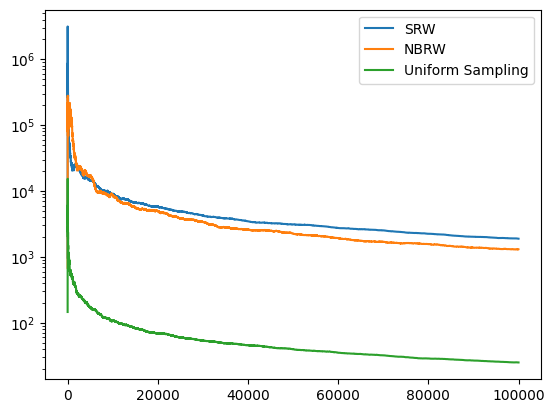

In [ ]:
plt.plot(np.arange(0, num_iter), (exp_loss_srw), label = 'SRW')
plt.plot(np.arange(0, num_iter), (exp_loss_nbrw), label = 'NBRW')
plt.plot(np.arange(0, num_iter), (exp_loss_us), label = 'Uniform Sampling')
plt.yscale('log')
plt.legend()

#### Single shuffling

In [ ]:
losses_ss = []

num_expts = 50

for expt in range(num_expts):

  print("Running experiment:", expt+1)

  node_perm = np.random.permutation(np.arange(0, n))

  theta = np.random.rand(k, 1)

  num_iter = int(1e5)

  ep_loss = []

  for i in range(1, num_iter + 1):

    current_node = node_perm[(i-1)%n]

    a_i = A[:, current_node].reshape(k, 1)
    D_i = D[:, :, current_node].reshape(k, k)

    gamma = 1/(i**(0.9))

    grad_g = 2*( (a_i @ (a_i.T) + D_i) @ theta) + b

    theta -= gamma * grad_g

    ep_loss.append(np.linalg.norm(theta - theta_optim)**2)

  losses_ss.append(ep_loss)

Running experiment: 1
Running experiment: 2
Running experiment: 3
Running experiment: 4
Running experiment: 5
Running experiment: 6
Running experiment: 7
Running experiment: 8
Running experiment: 9
Running experiment: 10
Running experiment: 11
Running experiment: 12
Running experiment: 13
Running experiment: 14
Running experiment: 15
Running experiment: 16
Running experiment: 17
Running experiment: 18
Running experiment: 19
Running experiment: 20
Running experiment: 21
Running experiment: 22
Running experiment: 23
Running experiment: 24
Running experiment: 25
Running experiment: 26
Running experiment: 27
Running experiment: 28
Running experiment: 29
Running experiment: 30
Running experiment: 31
Running experiment: 32
Running experiment: 33
Running experiment: 34
Running experiment: 35
Running experiment: 36
Running experiment: 37
Running experiment: 38
Running experiment: 39
Running experiment: 40
Running experiment: 41
Running experiment: 42
Running experiment: 43
Running experiment: 

In [ ]:
exp_loss_ss = np.mean(np.array(losses_ss), axis = 0)

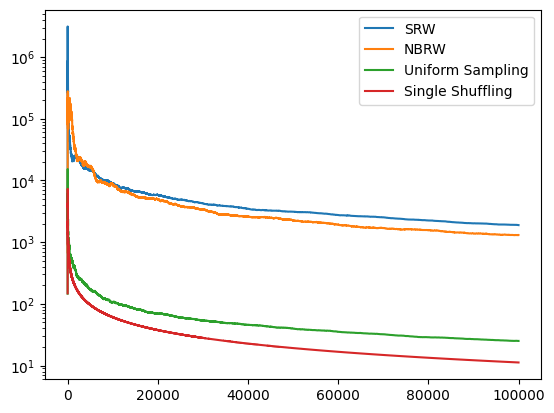

In [ ]:
plt.plot(np.arange(0, num_iter), (exp_loss_srw), label = 'SRW')
plt.plot(np.arange(0, num_iter), (exp_loss_nbrw), label = 'NBRW')
plt.plot(np.arange(0, num_iter), (exp_loss_us), label = 'Uniform Sampling')
plt.plot(np.arange(0, num_iter), (exp_loss_ss), label = 'Single Shuffling')
plt.yscale('log')
plt.legend()

#### Random shuffling

In [ ]:
losses_rs = []

num_expts = 50

for expt in range(num_expts):

  print("Running experiment:", expt+1)

  theta = np.random.rand(k, 1)

  num_iter = int(1e5)

  ep_loss = []

  for i in range(1, num_iter + 1):

    if (i-1)%n == 0:
      node_perm = np.random.permutation(np.arange(0, n))

    current_node = node_perm[(i-1)%n]

    a_i = A[:, current_node].reshape(k, 1)
    D_i = D[:, :, current_node].reshape(k, k)

    gamma = 1/(i**(0.9))

    grad_g = 2*( (a_i @ (a_i.T) + D_i) @ theta) + b

    theta -= gamma * grad_g

    ep_loss.append(np.linalg.norm(theta - theta_optim)**2)

  losses_rs.append(ep_loss)

Running experiment: 1
Running experiment: 2
Running experiment: 3
Running experiment: 4
Running experiment: 5
Running experiment: 6
Running experiment: 7
Running experiment: 8
Running experiment: 9
Running experiment: 10
Running experiment: 11
Running experiment: 12
Running experiment: 13
Running experiment: 14
Running experiment: 15
Running experiment: 16
Running experiment: 17
Running experiment: 18
Running experiment: 19
Running experiment: 20
Running experiment: 21
Running experiment: 22
Running experiment: 23
Running experiment: 24
Running experiment: 25
Running experiment: 26
Running experiment: 27
Running experiment: 28
Running experiment: 29
Running experiment: 30
Running experiment: 31
Running experiment: 32
Running experiment: 33
Running experiment: 34
Running experiment: 35
Running experiment: 36
Running experiment: 37
Running experiment: 38
Running experiment: 39
Running experiment: 40
Running experiment: 41
Running experiment: 42
Running experiment: 43
Running experiment: 

In [ ]:
exp_loss_rs = np.mean(np.array(losses_rs), axis = 0)

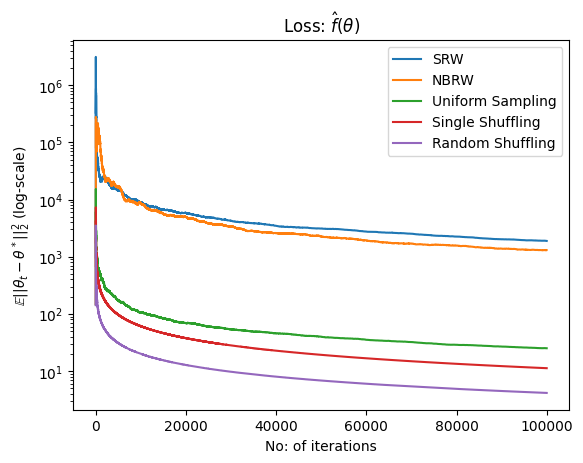

In [ ]:
plt.plot(np.arange(1, num_iter+1), (exp_loss_srw), label = 'SRW')
plt.plot(np.arange(1, num_iter+1), (exp_loss_nbrw), label = 'NBRW')
plt.plot(np.arange(1, num_iter+1), (exp_loss_us), label = 'Uniform Sampling')
plt.plot(np.arange(1, num_iter+1), (exp_loss_ss), label = 'Single Shuffling')
plt.plot(np.arange(1, num_iter+1), (exp_loss_rs), label = 'Random Shuffling')
plt.yscale('log')
plt.title(r"Loss: $\hat{f}(\theta)$")
plt.ylabel(r"$\mathbb{E}||\theta_t - \theta^*||^2_2$ (log-scale)")
plt.xlabel("No: of iterations")
plt.legend()
plt.savefig("drive/MyDrive/EE5111/convex_loss.eps", format='eps', bbox_inches = 'tight')

In [ ]:
gammas = [1/(x**(0.9)) for x in range(1, num_iter+1)]

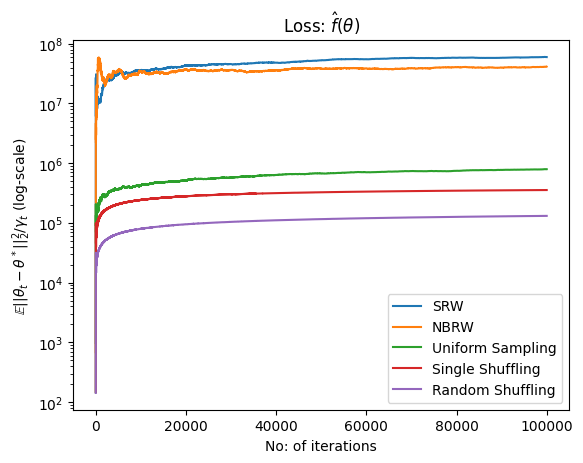

In [ ]:
plt.plot(np.arange(0, num_iter), (exp_loss_srw/gammas), label = 'SRW')
plt.plot(np.arange(0, num_iter), (exp_loss_nbrw/gammas), label = 'NBRW')
plt.plot(np.arange(0, num_iter), (exp_loss_us/gammas), label = 'Uniform Sampling')
plt.plot(np.arange(0, num_iter), (exp_loss_ss/gammas), label = 'Single Shuffling')
plt.plot(np.arange(0, num_iter), (exp_loss_rs/gammas), label = 'Random Shuffling')
plt.yscale('log')
plt.title(r"Loss: $\hat{f}(\theta)$")
plt.ylabel(r"$\mathbb{E}||\theta_t - \theta^*||^2_2 / \gamma_t$ (log-scale)")
plt.xlabel("No: of iterations")
plt.legend()
plt.savefig("drive/MyDrive/EE5111/convex_loss_gamma.eps", format='eps', bbox_inches = 'tight')